# Importing Libraries

In [1]:
# importing necessary librarires
import pandas as pd
import numpy as np
import warnings
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
%matplotlib inline

# Reading the csv file and undersatanding of the data¶ 

In [2]:
# reading the csv file and printing the top 5 rows to understand the data
lead = pd.read_csv("Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


- Prospect Id & Lead number are just for Identification so they can be dropped from the dataset

In [3]:
# getting the info of dataframe like column type, content, null value etc..
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- many columns are having null values which needs to be handle in Data cleaning & preparation

In [4]:
# knowing the shape of dataframe -> rows & column of dataframe
lead.shape

(9240, 37)

- 9240 rows
- 37 columns

In [5]:
# getting the statistical summary of dataframe -> min, max, 50 percentile, mean etc.
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# checking null percentage of each column
null = lead.isnull().sum() / lead.shape[0] * 100
null.sort_values(ascending=False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

- many columns having null values which needs to be handled

# Cleaning the Data

In [7]:
# dropping unnecessary column
lead = lead.drop(["Prospect ID","Lead Number"],1)
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
# drop columns whose null value % is greater than 40%
cols=list(null[null>40].index)
for i in cols:
    lead.drop(i,axis=1,inplace=True)
# checking shape of lead after dropping the columns
lead.shape

(9240, 30)

In [9]:
# Checking if there are columns with one unique value
lead.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [10]:
# Dropping unique columns
lead= lead.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],1)

In [11]:
# again checking null percentage of each column
null = lead.isnull().sum() / lead.shape[0] * 100
null.sort_values(ascending=False)

Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Newspaper                                         0.000000
A free copy of Mastering The Interview            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Lead Origin                                       0.0000

# Imputing missing values

## Categorical Variable

In [12]:
# checking the value count of Tags column
lead.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [13]:
# replacing all the null values with mode of 'Tags' as it is a categorical column
m = lead.Tags.mode()[0]
lead.Tags[lead.Tags.isnull()==True] = m

In [14]:
# checking the value count of Tags column
lead.Tags.value_counts()

Will revert after reading the email                  5425
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [15]:
# checking the value count of 'Lead Profile' column
lead['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [16]:
# Checking the columns with select value in it
col = []
for i in lead.columns:
    if lead[i][lead[i]=='Select'].count()>0:
        col.append(i)
print(col)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [17]:
# replacing teh select value with Nan
for i in col:
    lead[i][lead[i]=='Select'] = np.nan

In [18]:
# again checking null percentage of each column
null = lead.isnull().sum() / lead.shape[0] * 100
null.sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
City                                             39.707792
Specialization                                   36.580087
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Newspaper                                         0.000000
A free copy of Mastering The Interview            0.000000
Tags                                              0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Lead Origin                                       0.0000

In [19]:
# drop columns whose null value % is greater than 40%
cols=list(null[null>40].index)
for i in cols:
    lead.drop(i,axis=1,inplace=True)
# checking shape of lead after dropping the columns
lead.shape

(9240, 23)

In [20]:
# again checking null percentage of each column
null = lead.isnull().sum() / lead.shape[0] * 100
null.sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
X Education Forums                                0.000000
A free copy of Mastering The Interview            0.000000
Tags                                              0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
Lead Origin                                       0.000000
Newspaper Article                                 0.0000

In [21]:
# checking the value count of City column
lead.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [22]:
# replacing all the null values with mode of 'City' as it is a categorical column
m = lead.City.mode()[0]
lead.City[lead.City.isnull()==True] = m

In [23]:
# replacing all the null values with NA of 'Specialization' as student also exist in dataframe
lead.Specialization[lead.Specialization.isnull()==True] = "NA"

In [24]:
# replacing all the null values with mode of 'What matters most to you in choosing a course' as it is a categorical column
m = lead['What matters most to you in choosing a course'].mode()[0]
lead['What matters most to you in choosing a course'][lead['What matters most to you in choosing a course'].isnull()==True] = m

In [25]:
# replacing all the null values with mode of 'What is your current occupation' as it is a categorical column
m = lead['What is your current occupation'].mode()[0]
lead['What is your current occupation'][lead['What is your current occupation'].isnull()==True] = m

In [26]:
# replacing all the null values with mode of 'Country' as it is a categorical column
m = lead.Country.mode()[0]
lead.Country[lead.Country.isnull()==True] = m

In [27]:
# dropping rows for those column where null values is very less < 2%
lead = lead[~lead.TotalVisits.isnull()]
lead = lead[~lead['Page Views Per Visit'].isnull()]
lead = lead[~lead['Last Activity'].isnull()]
lead = lead[~lead['Lead Source'].isnull()]

In [28]:
# again checking null percentage of each column
null = lead.isnull().sum() / lead.shape[0] * 100
null.sort_values(ascending=False)

Lead Origin                                      0.0
What matters most to you in choosing a course    0.0
A free copy of Mastering The Interview           0.0
City                                             0.0
Tags                                             0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Search                                           0.0
What is your current occupation                  0.0
Lead Source                                      0.0
Specialization                                   0.0
Country                                          0.0
Last Activity                                    0.0
Page Views Per Visit                             0.0
Total Time Spent on Website                      0.0
TotalVisits                                   

In [29]:
# checking column type in dataframe
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

# EDA

## Checking dependent categorical variable against the target variable

In [30]:
def graph(var1):
    plt.figure(figsize=[10,8])
    temp=lead[var1]
    sns.countplot(temp,hue=lead.Converted)
    plt.xticks(rotation=90)
    plt.xlabel(var1,fontsize=10)
    plt.ylabel("Value Counts",fontsize=10)
    plt.title("Checking {0} of client".format(var1),fontsize=15)
    plt.show()

In [31]:
# categorical column in our dataset
col = lead.columns[lead.dtypes == "object"]
col

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

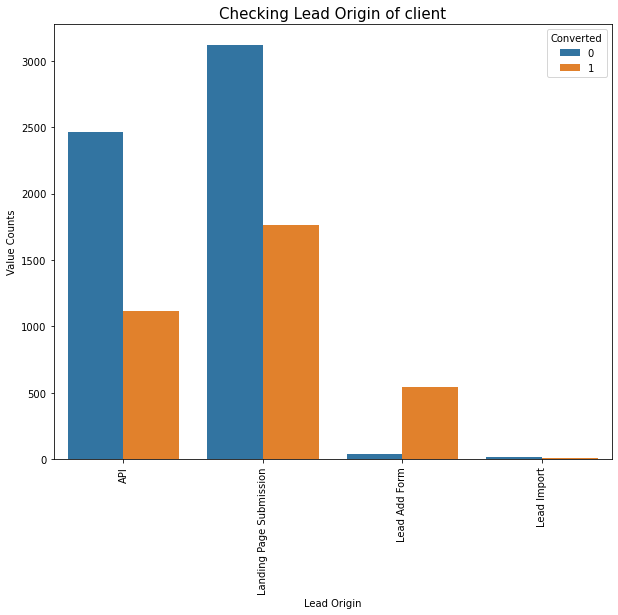

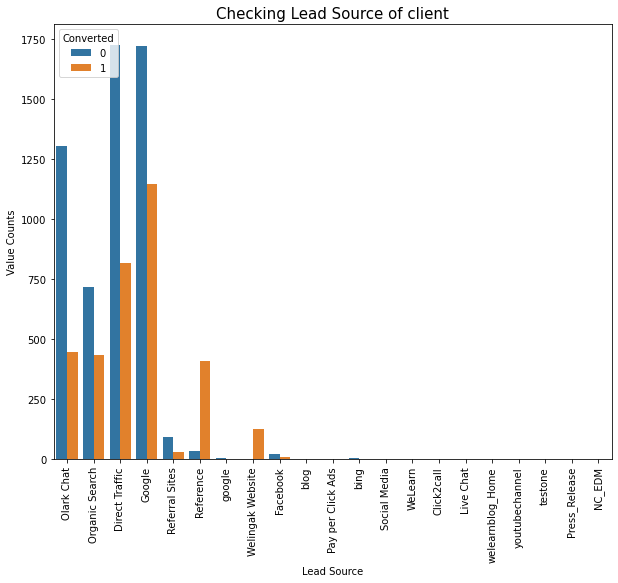

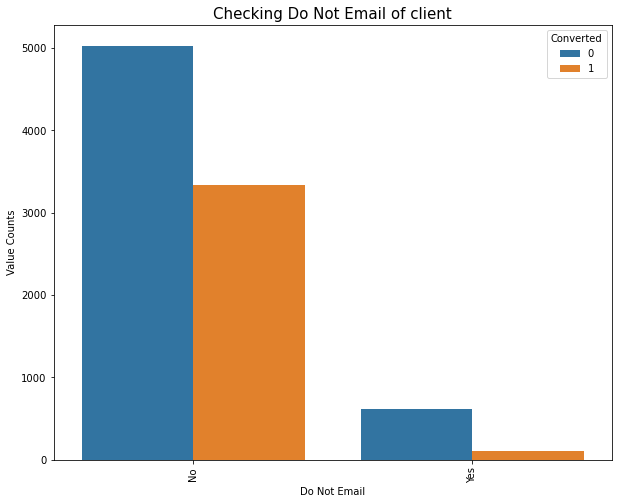

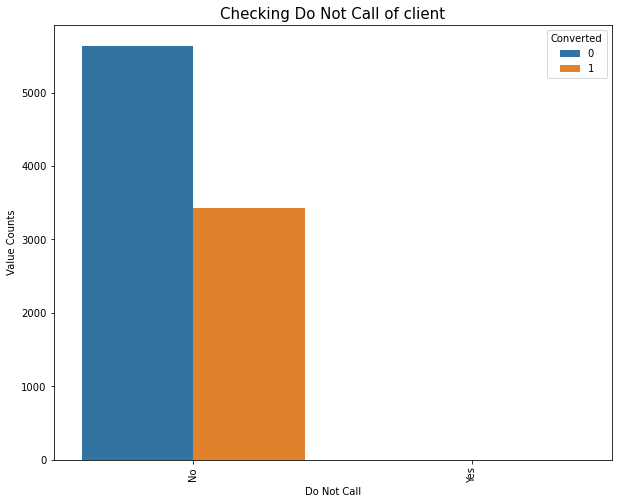

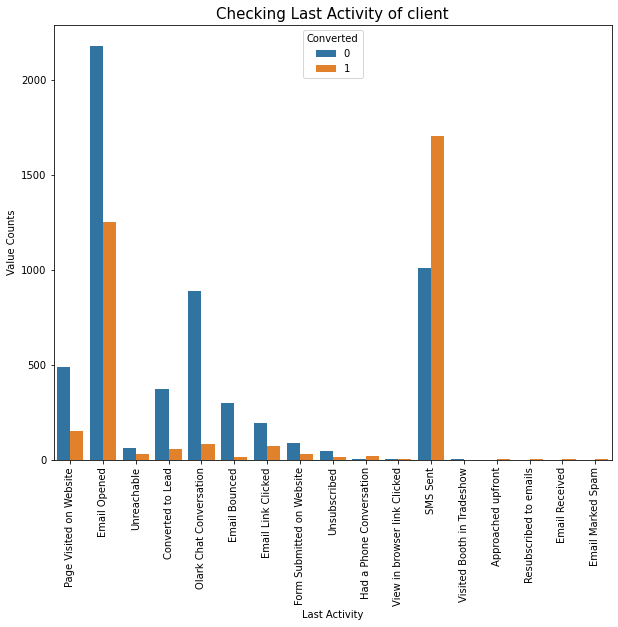

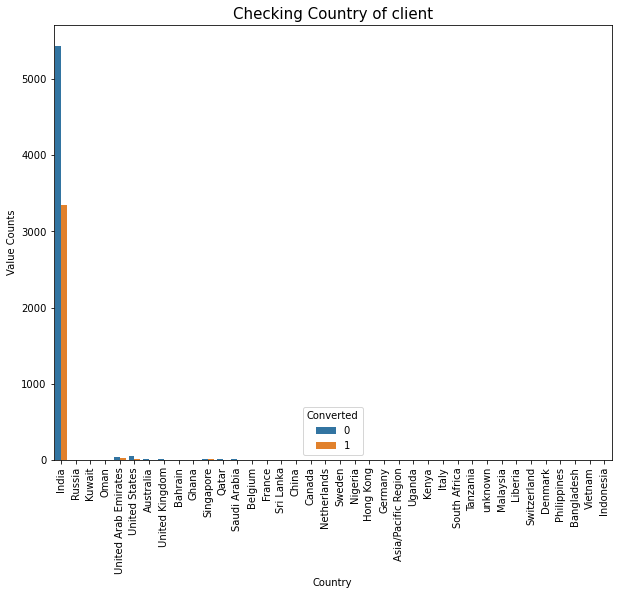

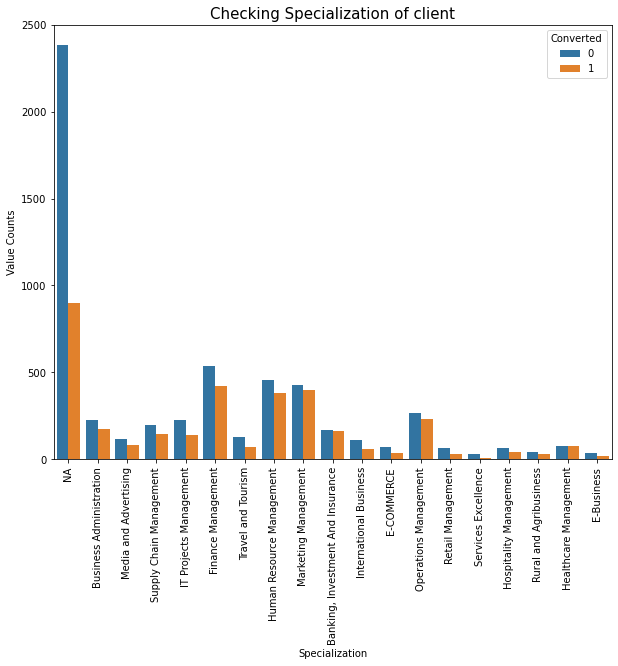

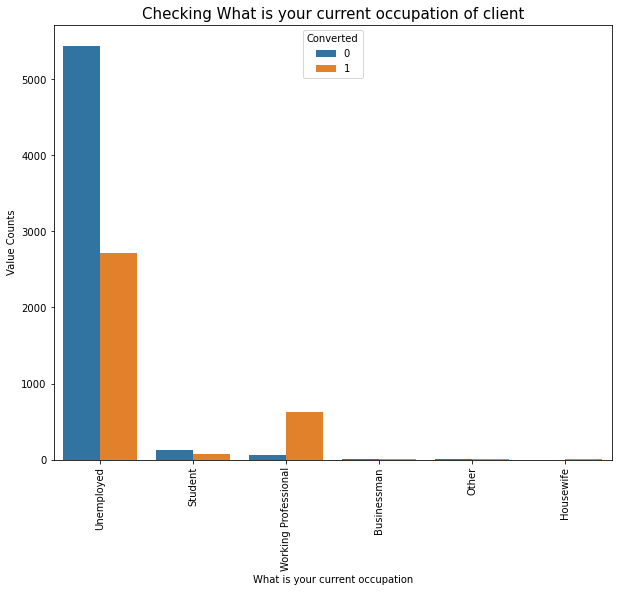

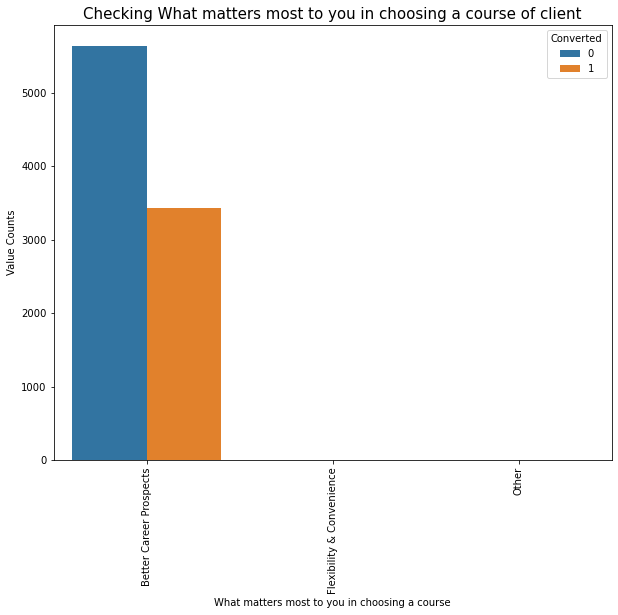

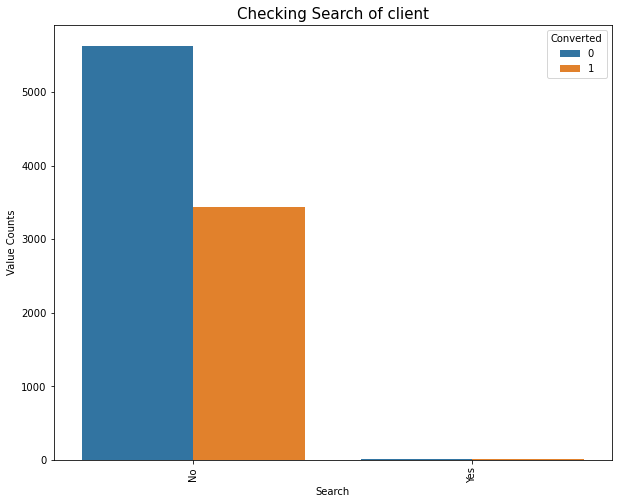

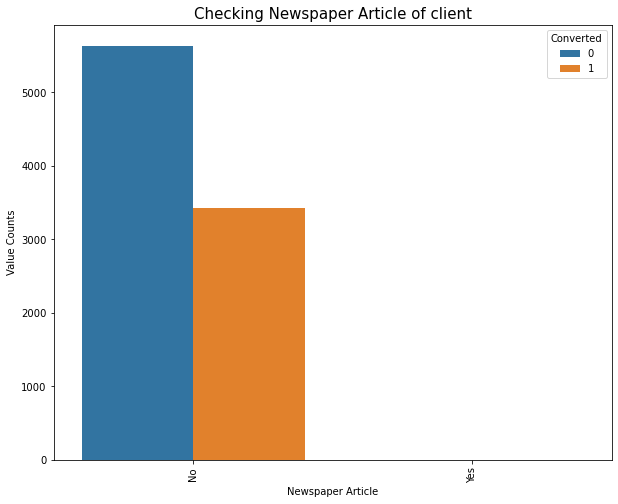

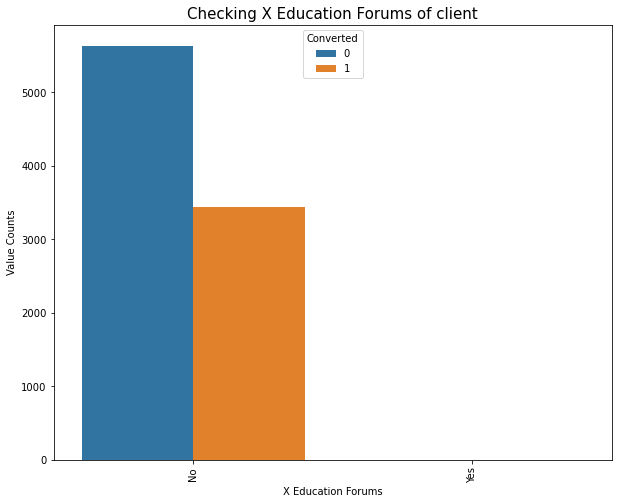

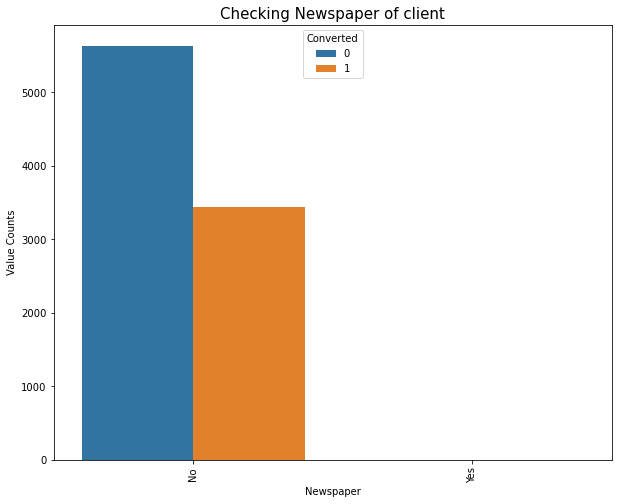

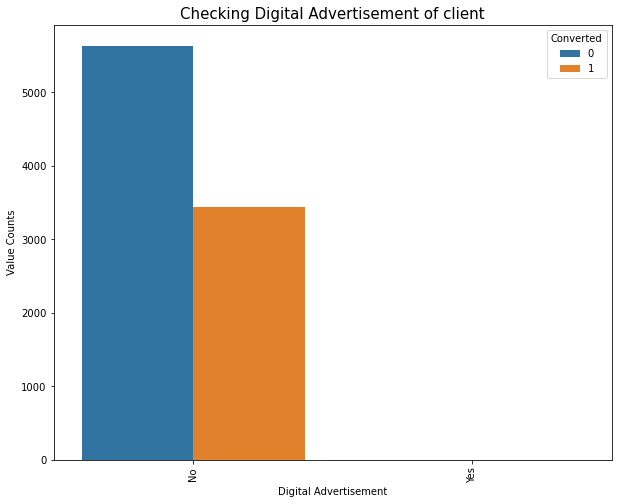

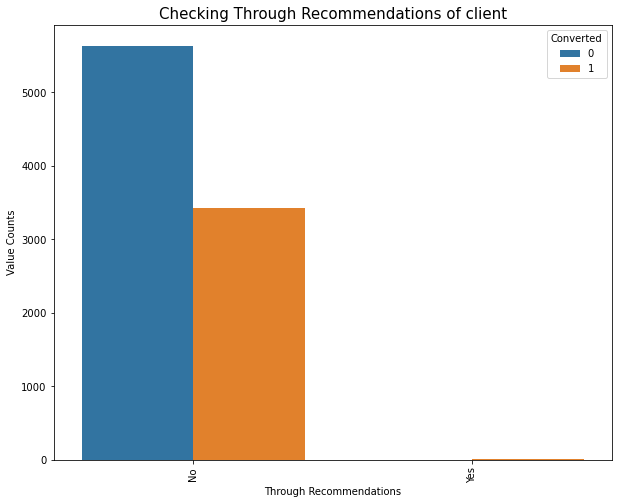

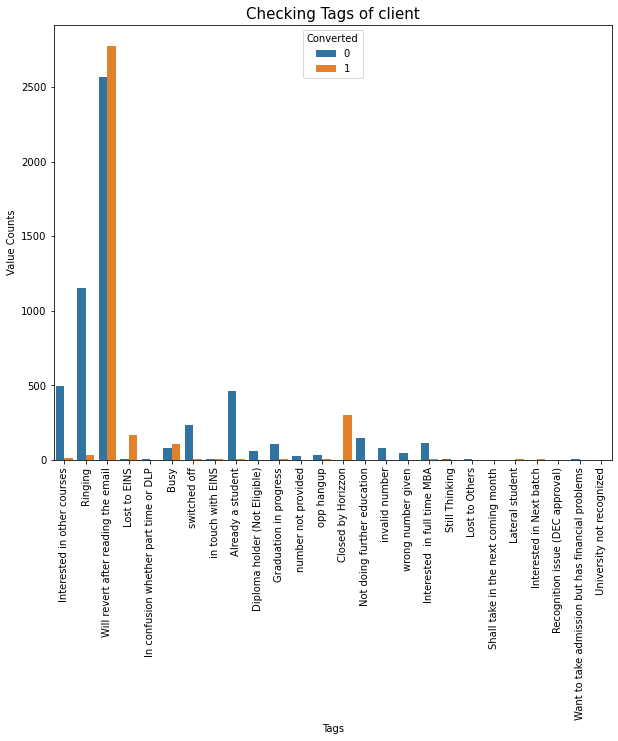

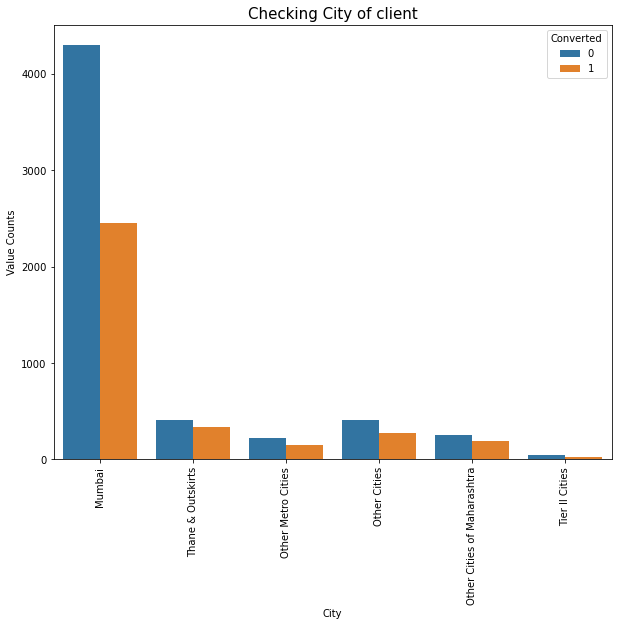

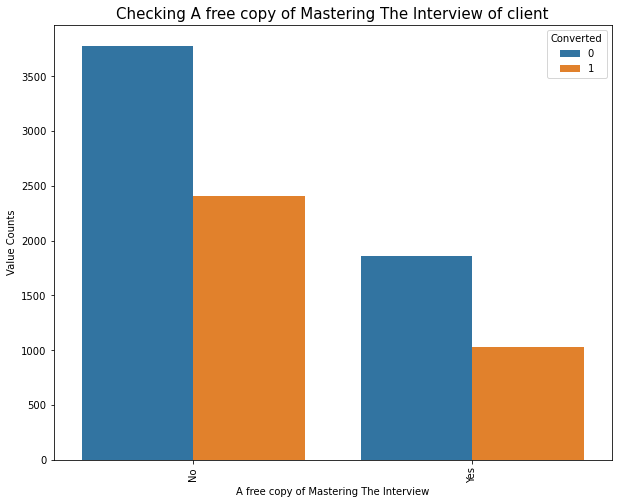

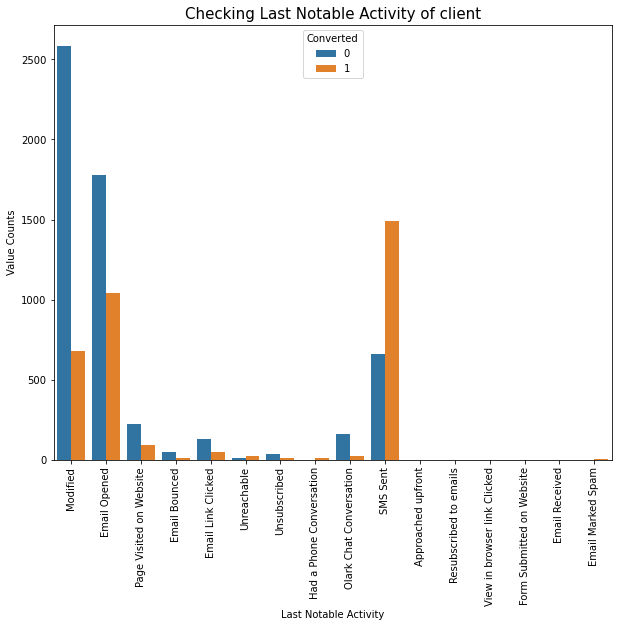

In [32]:
# Analysis of each categorical variable
for i in col:
    graph(i)

In [33]:
# dropping some columns as they are completely skewed
col = ['Do Not Call','Country','What matters most to you in choosing a course','Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations']
for i in col:
    lead.drop(i,axis=1,inplace=True)

- Inference
    - Maximun number of leads are generated by Landing page submission followed by Api followed by lead add form.
    - Maximum number of leads are generated by Google and Direct traffic followed by organic search.
    - Client who is opting for Do not email has higher conversin rate of lead.
    - Based on the Last activity and last Notabel activity SMS sent and email opened has high conversin rate of 
      lead.
    - Finance Management clients have higher rate of conversion to leads.
    - Unemployed clients have high rate of conversion of leads.
    - Clients who will revert after reading email has higher rate of lead conversion.
    - Mumbai clients have higher conversio rate.
    - Clients who don't want free copy of mastering the interview has higher conversion rate.

## Checking dependent continous variable against the target variable

In [34]:
def graph2(var1):
    plt.figure(figsize=[12,8])
    sns.boxplot(y = var1, x = 'Converted', data = lead)
    plt.xlabel('Converted',fontsize=10)
    plt.ylabel(var1,fontsize=10)
    plt.title("{0} of client".format(var1),fontsize=13)
    plt.show()

In [35]:
# Continous column in our dataset
col = lead.columns[lead.dtypes != "object"]
col

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

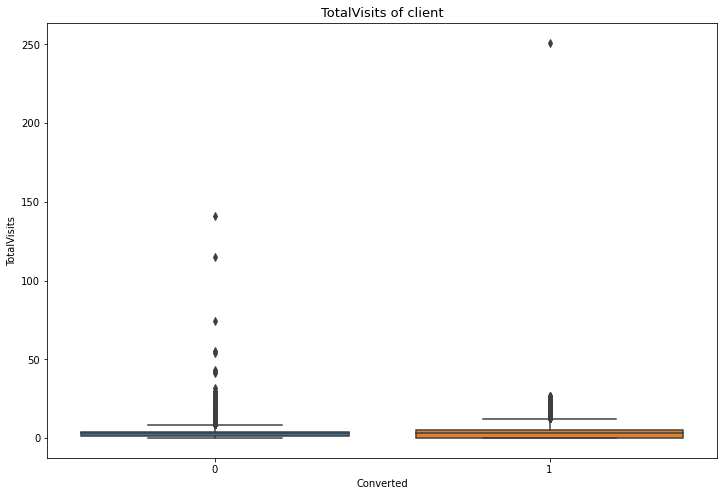

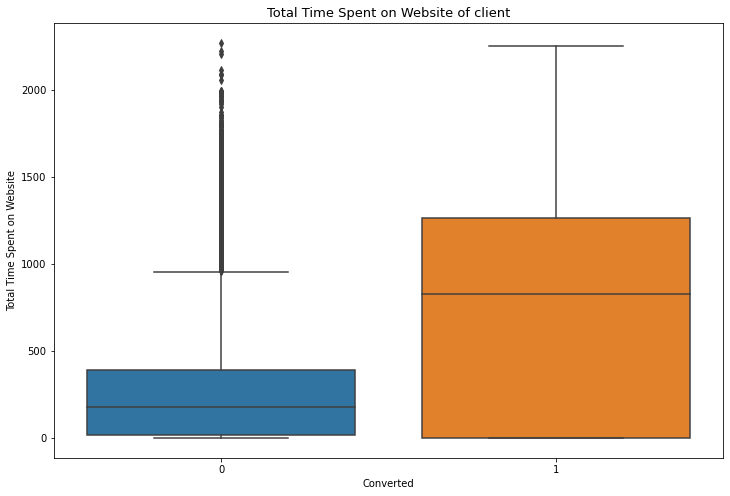

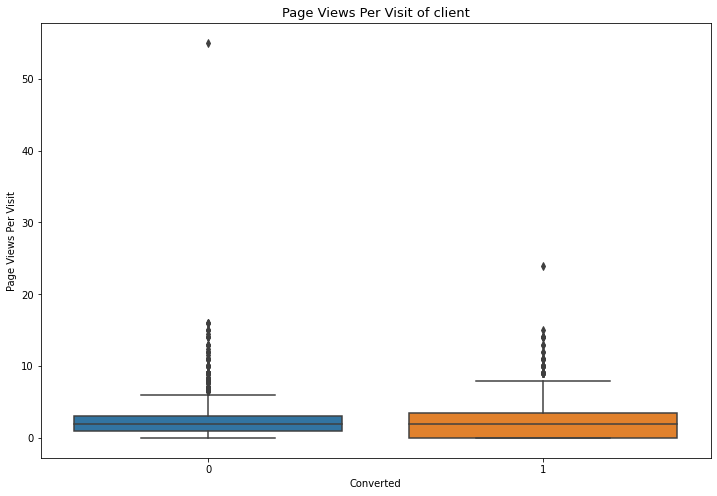

In [36]:
# Analysis of each categorical variable
for i in col:
    if i != 'Converted':
        graph2(i)

In [37]:
# Checking for outliers in the continuous variables
num_lead = lead[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']]
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_lead.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


In [38]:
# Total visit and page view per visit are having outliers which needs to be handled
Q3 = lead.TotalVisits.quantile(0.99)
lead = lead[(lead.TotalVisits <= Q3)]

Q3 = lead['Page Views Per Visit'].quantile(0.99)
lead = lead[lead['Page Views Per Visit'] <= Q3]

- Inference
    - clients spending more time on the website has higher conversion rate.

# Data Preparation

In [39]:
# displaying top 5 rows of dataset
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NA,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,NA,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,NA,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [40]:
# checking columns type
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8924 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8924 non-null   object 
 1   Lead Source                             8924 non-null   object 
 2   Do Not Email                            8924 non-null   object 
 3   Converted                               8924 non-null   int64  
 4   TotalVisits                             8924 non-null   float64
 5   Total Time Spent on Website             8924 non-null   int64  
 6   Page Views Per Visit                    8924 non-null   float64
 7   Last Activity                           8924 non-null   object 
 8   Specialization                          8924 non-null   object 
 9   What is your current occupation         8924 non-null   object 
 10  Tags                                    8924 non-null   obje

In [41]:
# Converting some binary variables (Yes/No) to 0/1
# List of variables to map

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead[varlist] = lead[varlist].apply(binary_map)

In [42]:
# displaying top 5 rows
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,NA,Unemployed,Interested in other courses,Mumbai,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,NA,Unemployed,Ringing,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,NA,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [43]:
# checking value count of each categorical feature
col = lead.columns[lead.dtypes == "object"]
for i in col:
    print(lead[i].value_counts())
    print("**************************************************")

Landing Page Submission    4768
API                        3546
Lead Add Form               580
Lead Import                  30
Name: Lead Origin, dtype: int64
**************************************************
Google               2836
Direct Traffic       2499
Olark Chat           1751
Organic Search       1092
Reference             442
Welingak Website      129
Referral Sites        117
Facebook               31
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
blog                    1
Press_Release           1
youtubechannel          1
testone                 1
NC_EDM                  1
Pay per Click Ads       1
WeLearn                 1
welearnblog_Home        1
Name: Lead Source, dtype: int64
**************************************************
Email Opened                    3385
SMS Sent                        2678
Olark Chat Conversation          966
Page Visited on Website          594
Converted to

As we have seen for some columns the value count for variable is very less so we can club those variable before
creating dummies

In [44]:
lead["Lead Source"] = lead["Lead Source"].replace(['Facebook','bing','Click2call','Live Chat','Press_Release',
                                                   'Social Media','Pay per Click Ads','NC_EDM','blog',
                                                   'WeLearn','youtubechannel','testone','welearnblog_Home'],
                                                  "Others")
lead["Lead Source"] = lead["Lead Source"].replace("google","Google")

In [45]:
lead['Last Activity'] = lead['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                       'Had a Phone Conversation','View in browser link Clicked',
                                                       'Approached upfront','Email Received','Email Marked Spam',
                                                       'Resubscribed to emails','Visited Booth in Tradeshow'],
                                                     "Others")

In [46]:
lead["Specialization"] = lead["Specialization"].replace(['Finance Management','Human Resource Management',
                                                         'Marketing Management','Operations Management',
                                                         'IT Projects Management','Supply Chain Management',
                                                        'Healthcare Management','Hospitality Management',
                                                         'Retail Management'],"Management")

In [47]:
lead['Tags'] = lead["Tags"].replace(['Not doing further education','Interested  in full time MBA',
                                    'Graduation in progress','invalid number','Diploma holder (Not Eligible)',
                                    'wrong number given','opp hangup','number not provided','in touch with EINS',
                                    'Lost to Others','Still Thinking',
                                    'Want to take admission but has financial problems',
                                    'In confusion whether part time or DLP',
                                    'Interested in Next batch','Lateral student',
                                    'Shall take in the next coming month','University not recognized',
                                    'Recognition issue (DEC approval)'],"Others")

In [48]:
lead['Last Notable Activity'] = lead['Last Notable Activity'].replace(['Unreachable','Unsubscribed',
                                                                       'Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                       'Resubscribed to emails',
                                                                       'Form Submitted on Website',
                                                                       'View in browser link Clicked',
                                                                       'Email Received','Approached upfront'],
                                                                      "Others")

## Dummy Variable Creation

In [49]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8924 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8924 non-null   object 
 1   Lead Source                             8924 non-null   object 
 2   Do Not Email                            8924 non-null   int64  
 3   Converted                               8924 non-null   int64  
 4   TotalVisits                             8924 non-null   float64
 5   Total Time Spent on Website             8924 non-null   int64  
 6   Page Views Per Visit                    8924 non-null   float64
 7   Last Activity                           8924 non-null   object 
 8   Specialization                          8924 non-null   object 
 9   What is your current occupation         8924 non-null   object 
 10  Tags                                    8924 non-null   obje

In [50]:
dummy = pd.get_dummies(lead[['Lead Origin','What is your current occupation','City']], drop_first=True)
lead = pd.concat([lead,dummy],1)

In [51]:
dummy = pd.get_dummies(lead['Specialization'],prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_NA'], 1)
lead = pd.concat([lead, dummy], axis = 1)

dummy = pd.get_dummies(lead['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
lead = pd.concat([lead, dummy], axis = 1)

dummy = pd.get_dummies(lead['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
lead = pd.concat([lead, dummy], axis = 1)

dummy = pd.get_dummies(lead['Last Notable Activity'],prefix='Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Others'], 1)
lead = pd.concat([lead, dummy], axis = 1)

dummy = pd.get_dummies(lead['Tags'],prefix='Tags')
dummy = dummy.drop(['Tags_Others'], 1)
lead = pd.concat([lead, dummy], axis = 1)

In [52]:
# dropping original categorical columns
col = lead.columns[lead.dtypes == "object"]
lead.drop(col,1,inplace = True)

# Test-Train Split

In [53]:
# Putting feature variable to X
X = lead.drop(['Converted'], axis=1)
# Putting response variable to y
y = lead['Converted']
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [54]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6246 entries, 6676 to 5847
Data columns (total 58 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6246 non-null   int64  
 1   TotalVisits                                           6246 non-null   float64
 2   Total Time Spent on Website                           6246 non-null   int64  
 3   Page Views Per Visit                                  6246 non-null   float64
 4   A free copy of Mastering The Interview                6246 non-null   int64  
 5   Lead Origin_Landing Page Submission                   6246 non-null   uint8  
 6   Lead Origin_Lead Add Form                             6246 non-null   uint8  
 7   Lead Origin_Lead Import                               6246 non-null   uint8  
 8   What is your current occupation_Housewife             6

# Feature Scaling

In [55]:
scaler = StandardScaler()
col = ['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']
X_train[col] = scaler.fit_transform(X_train[col])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,...,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
6676,0,-0.049636,1.395668,0.395289,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6138,0,0.297929,0.609686,0.926758,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
8650,0,-0.049636,1.178657,0.395289,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3423,0,-1.092332,-0.878390,-1.199117,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6552,0,-1.092332,-0.878390,-1.199117,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [56]:
# Checking the conversion Rate
conv = (sum(lead['Converted'])/len(lead['Converted'].index))*100
conv

37.75212909009413

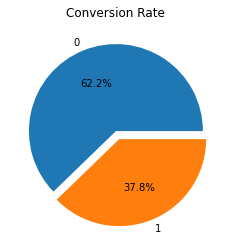

In [57]:
plt.pie(lead['Converted'].value_counts(), autopct='%1.1f%%',
        labels=lead.Converted.value_counts().index,explode=[0,0.1])
plt.title("Conversion Rate")
plt.show()

# Checking Correlation

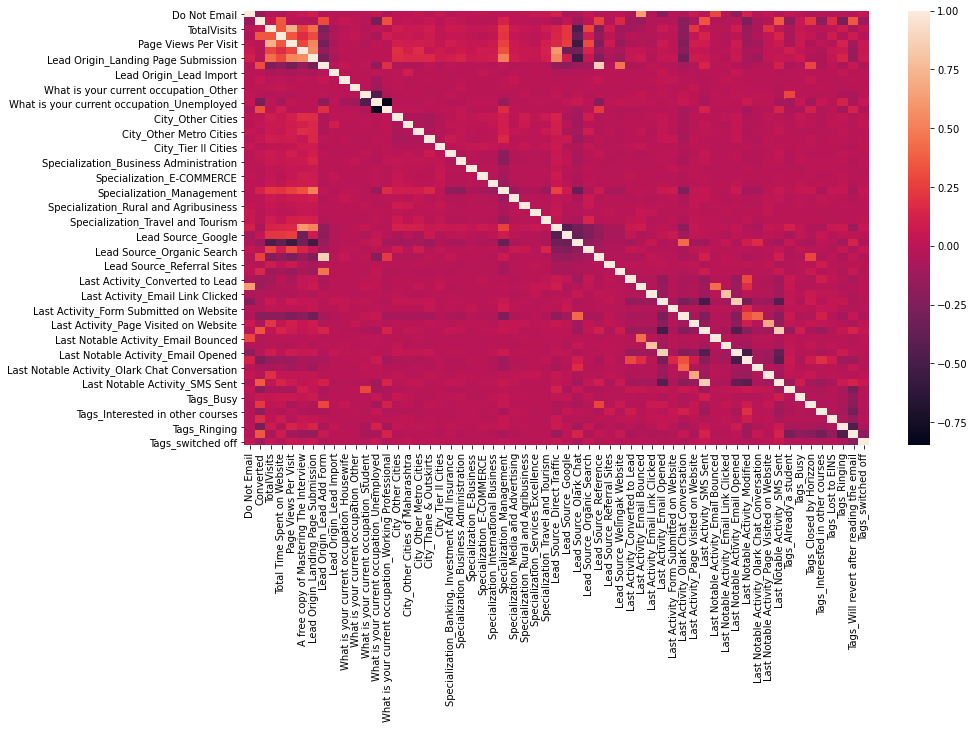

In [58]:
# Let's see the correlation matrix 
plt.figure(figsize = (14,8))        # Size of the figure
sns.heatmap(lead.corr())
plt.show()

# Model Building

In [59]:
# Coarse Tuning -> selecting top 15 variable
logreg = LogisticRegression()
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [60]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 39),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 38),
 ('A free copy of Mastering The Interview', False, 29),
 ('Lead Origin_Landing Page Submission', False, 5),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 17),
 ('What is your current occupation_Housewife', False, 26),
 ('What is your current occupation_Other', False, 30),
 ('What is your current occupation_Student', False, 43),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 41),
 ('City_Other Cities of Maharashtra', False, 44),
 ('City_Other Metro Cities', False, 42),
 ('City_Thane & Outskirts', False, 33),
 ('City_Tier II Cities', False, 14),
 ('Specialization_Banking, Investment And Insurance', False, 6),
 ('Specialization_Business Administration', False, 7),
 ('Specialization_E-Business', False, 25),
 ('Specia

In [61]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Source_Welingak Website',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Already a student', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off'],
      dtype='object')

In [62]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management', 'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Org

In [63]:
# Model 1
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6230
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1751.4
Date:                Mon, 08 Nov 2021   Deviance:                       3502.9
Time:                        00:03:50   Pearson chi2:                 1.01e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.9763      0.394     -7.551      0.000      -3.749      -2.204
Do Not Email                                            -1.7047      0.206     -8.275      0.000      -2.108      -1.301
Total Time Spent on Website                              1.0528      0.045     23.214      0.000       0.964       1.142
Lead Origin_Lead Add Form                                3.3456      0.289     11.590      0.000       2.780       3.911
What is your current occupation_Unemployed              -1.3235      0.344     -3.848      0.000      -1.998      -0.649
What is your current occupation_Working Professional     1.4703      0.420      3.504      0.000       0.648       2.293
Lead Source_Welingak Website                             1.2499      0.793      1.577      0.115      -0.304       2.804
Last Notable Activity_Olark Chat Conversation           -1.2082      0.352     -3.431      0.001      -1.898      -0.518
Last Notable Activity_SMS Sent                           2.6353      0.117     22.558      0.000       2.406       2.864
Tags_Already a student                                  -0.9169      0.637     -1.440      0.150      -2.165       0.331
Tags_Busy                                                3.2163      0.321     10.013      0.000       2.587       3.846
Tags_Closed by Horizzon                                  7.8127      0.757     10.321      0.000       6.329       9.296
Tags_Lost to EINS                                        7.4381      0.571     13.018      0.000       6.318       8.558
Tags_Ringing                                            -1.4281      0.334     -4.276      0.000      -2.083      -0.773
Tags_Will revert after reading the email                 3.5514      0.228     15.556      0.000       3.104       3.999
Tags_switched off                                       -1.6675      0.759     -2.196      0.028      -3.156      -0.179
========================================================================================================================
"""

Tags_Already a student has high p value means this is insignificant for the model and needs to be dropped

In [64]:
col = col.drop('Tags_Already a student',1)

In [65]:
# Model 2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6231
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1752.7
Date:                Mon, 08 Nov 2021   Deviance:                       3505.4
Time:                        00:03:51   Pearson chi2:                 1.02e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.2251      0.354     -9.109      0.000      -3.919      -2.531
Do Not Email                                            -1.6991      0.206     -8.240      0.000      -2.103      -1.295
Total Time Spent on Website                              1.0541      0.045     23.266      0.000       0.965       1.143
Lead Origin_Lead Add Form                                3.3651      0.289     11.634      0.000       2.798       3.932
What is your current occupation_Unemployed              -1.2260      0.327     -3.753      0.000      -1.866      -0.586
What is your current occupation_Working Professional     1.5736      0.404      3.896      0.000       0.782       2.365
Lead Source_Welingak Website                             1.2301      0.793      1.551      0.121      -0.324       2.784
Last Notable Activity_Olark Chat Conversation           -1.2125      0.351     -3.450      0.001      -1.901      -0.524
Last Notable Activity_SMS Sent                           2.6477      0.117     22.622      0.000       2.418       2.877
Tags_Busy                                                3.3626      0.312     10.777      0.000       2.751       3.974
Tags_Closed by Horizzon                                  7.9637      0.753     10.580      0.000       6.488       9.439
Tags_Lost to EINS                                        7.5909      0.566     13.422      0.000       6.482       8.699
Tags_Ringing                                            -1.2906      0.327     -3.953      0.000      -1.931      -0.651
Tags_Will revert after reading the email                 3.7014      0.214     17.300      0.000       3.282       4.121
Tags_switched off                                       -1.5268      0.756     -2.020      0.043      -3.008      -0.045
========================================================================================================================
"""

Lead Source_Welingak Website has high p value means this is insignificant for the model and needs to be dropped

In [66]:
col = col.drop('Lead Source_Welingak Website',1)

In [67]:
# Model 3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6232
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1754.2
Date:                Mon, 08 Nov 2021   Deviance:                       3508.5
Time:                        00:03:51   Pearson chi2:                 1.05e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.2448      0.356     -9.122      0.000      -3.942      -2.548
Do Not Email                                            -1.6832      0.205     -8.229      0.000      -2.084      -1.282
Total Time Spent on Website                              1.0550      0.045     23.270      0.000       0.966       1.144
Lead Origin_Lead Add Form                                3.5989      0.265     13.594      0.000       3.080       4.118
What is your current occupation_Unemployed              -1.2177      0.328     -3.710      0.000      -1.861      -0.574
What is your current occupation_Working Professional     1.5713      0.406      3.875      0.000       0.776       2.366
Last Notable Activity_Olark Chat Conversation           -1.2137      0.351     -3.454      0.001      -1.902      -0.525
Last Notable Activity_SMS Sent                           2.6460      0.117     22.614      0.000       2.417       2.875
Tags_Busy                                                3.3738      0.313     10.793      0.000       2.761       3.986
Tags_Closed by Horizzon                                  7.9717      0.753     10.585      0.000       6.496       9.448
Tags_Lost to EINS                                        7.6029      0.566     13.436      0.000       6.494       8.712
Tags_Ringing                                            -1.3105      0.328     -3.992      0.000      -1.954      -0.667
Tags_Will revert after reading the email                 3.7144      0.215     17.294      0.000       3.293       4.135
Tags_switched off                                       -1.5152      0.756     -2.004      0.045      -2.997      -0.033
========================================================================================================================
"""

In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,What is your current occupation_Unemployed,5.35
11,Tags_Will revert after reading the email,4.53
10,Tags_Ringing,1.80
4,What is your current occupation_Working Profes...,1.52
6,Last Notable Activity_SMS Sent,1.51
8,Tags_Closed by Horizzon,1.33
2,Lead Origin_Lead Add Form,1.30
12,Tags_switched off,1.15
7,Tags_Busy,1.14
1,Total Time Spent on Website,1.13


Tags_switched off has slightly higher p value

In [69]:
col = col.drop('Tags_switched off',1)

In [70]:
# Model 4

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6233
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1757.1
Date:                Mon, 08 Nov 2021   Deviance:                       3514.3
Time:                        00:03:51   Pearson chi2:                 9.94e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.3891      0.361     -9.395      0.000      -4.096      -2.682
Do Not Email                                            -1.6911      0.204     -8.286      0.000      -2.091      -1.291
Total Time Spent on Website                              1.0562      0.045     23.299      0.000       0.967       1.145
Lead Origin_Lead Add Form                                3.6188      0.266     13.614      0.000       3.098       4.140
What is your current occupation_Unemployed              -1.2752      0.334     -3.823      0.000      -1.929      -0.621
What is your current occupation_Working Professional     1.5402      0.412      3.742      0.000       0.733       2.347
Last Notable Activity_Olark Chat Conversation           -1.2150      0.352     -3.453      0.001      -1.905      -0.525
Last Notable Activity_SMS Sent                           2.6184      0.116     22.656      0.000       2.392       2.845
Tags_Busy                                                3.5856      0.305     11.763      0.000       2.988       4.183
Tags_Closed by Horizzon                                  8.1714      0.751     10.882      0.000       6.700       9.643
Tags_Lost to EINS                                        7.8044      0.563     13.866      0.000       6.701       8.908
Tags_Ringing                                            -1.0903      0.319     -3.416      0.001      -1.716      -0.465
Tags_Will revert after reading the email                 3.9190      0.206     19.070      0.000       3.516       4.322
========================================================================================================================
"""

In [71]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,What is your current occupation_Unemployed,4.76
11,Tags_Will revert after reading the email,4.09
10,Tags_Ringing,1.69
6,Last Notable Activity_SMS Sent,1.49
4,What is your current occupation_Working Profes...,1.48
8,Tags_Closed by Horizzon,1.31
2,Lead Origin_Lead Add Form,1.30
1,Total Time Spent on Website,1.13
7,Tags_Busy,1.12
9,Tags_Lost to EINS,1.12


In [72]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6676    0.674547
6138    0.925331
8650    0.964939
3423    0.158019
6552    0.158019
1696    0.104257
2110    0.982108
6830    0.067701
2581    0.019160
5927    0.174564
dtype: float64

In [73]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['ProspectID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,ProspectID
6676,1,0.674547,6676
6138,1,0.925331,6138
8650,1,0.964939,8650
3423,0,0.158019,3423
6552,0,0.158019,6552


In [74]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ProspectID,predicted
6676,1,0.674547,6676,1
6138,1,0.925331,6138,1
8650,1,0.964939,8650,1
3423,0,0.158019,3423,0
6552,0,0.158019,6552,0


# Model Evaluation

In [75]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8962536023054755


In [76]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3608,  263],
       [ 385, 1990]])

In [77]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [78]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8378947368421052

In [79]:
# Let us calculate specificity
TN / float(TN+FP)

0.9320588995091708

In [80]:
# Calculate false postive rate - predicting Converted when customer does not Converted
print(FP/ float(TN+FP))

0.06794110049082924


In [81]:
# positive predictive value 
print (TP / float(TP+FP))

0.8832667554371949


In [82]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9035812672176309


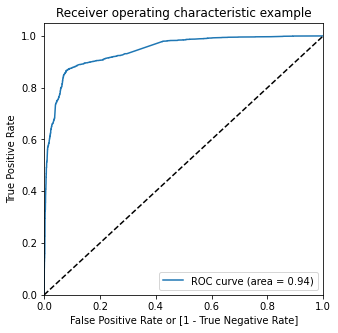

In [83]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [84]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ProspectID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
6676,1,0.674547,6676,1,1,1,1,1,1,1,1,0,0,0
6138,1,0.925331,6138,1,1,1,1,1,1,1,1,1,1,1
8650,1,0.964939,8650,1,1,1,1,1,1,1,1,1,1,1
3423,0,0.158019,3423,0,1,1,0,0,0,0,0,0,0,0
6552,0,0.158019,6552,0,1,1,0,0,0,0,0,0,0,0


In [85]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380243  1.000000  0.000000
0.1   0.1  0.720141  0.980632  0.560320
0.2   0.2  0.830932  0.912000  0.781193
0.3   0.3  0.886327  0.880842  0.889693
0.4   0.4  0.899776  0.864842  0.921209
0.5   0.5  0.896254  0.837895  0.932059
0.6   0.6  0.886007  0.796211  0.941100
0.7   0.7  0.875120  0.741053  0.957375
0.8   0.8  0.839898  0.613474  0.978817
0.9   0.9  0.807717  0.508211  0.991475


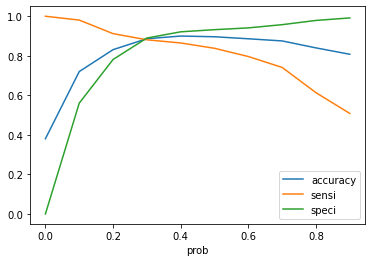

In [86]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [87]:
# From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,ProspectID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
6676,1,0.674547,6676,1,1,1,1,1,1,1,1,0,0,0,1
6138,1,0.925331,6138,1,1,1,1,1,1,1,1,1,1,1,1
8650,1,0.964939,8650,1,1,1,1,1,1,1,1,1,1,1,1
3423,0,0.158019,3423,0,1,1,0,0,0,0,0,0,0,0,0
6552,0,0.158019,6552,0,1,1,0,0,0,0,0,0,0,0,0


In [88]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8863272494396414

In [89]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3444,  427],
       [ 283, 2092]])

In [90]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [91]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8808421052631579

In [92]:
# Let us calculate specificity
TN / float(TN+FP)

0.8896925858951176

In [93]:
# Calculate false postive rate - predicting Converetd when customer does not converetd
print(FP/ float(TN+FP))

0.11030741410488246


In [94]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8304882890035729


In [95]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9240676147035148


The model seems to be good as we have good metrics and roc value has nearly equal to 0.9
- Accuracy : 88.63%
- Sensitivity : 88.08%
- Specificity : 88.97%

In [96]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3444,  427],
       [ 283, 2092]])

In [97]:
# Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8304882890035729

In [98]:
# Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8808421052631579

In [99]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8304882890035729

In [100]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8808421052631579

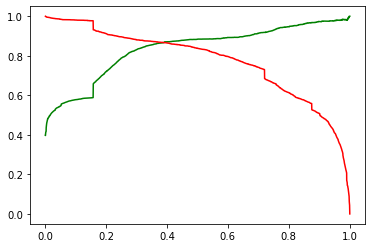

In [101]:
# Precision Recall Tradeoff
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Making Prediction on test set

In [102]:
cols = ['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']
X_test[cols] = scaler.transform(X_test[cols])
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email
7625,0,2.077703,0,1,0,0,0,0,0,0,0,0
5207,0,0.739164,0,1,0,0,0,0,0,0,0,1
2390,0,-0.878390,1,1,0,0,1,0,0,0,0,1
4362,0,-0.455310,0,1,0,0,1,0,0,0,1,0
1023,0,-0.300302,0,1,0,0,0,0,0,0,0,0


In [103]:
X_test_sm = sm.add_constant(X_test)

## Prediction on test set

In [104]:
y_test_pred = res.predict(X_test_sm)

In [105]:
y_test_pred[:10]

7625    0.078003
5207    0.508855
2390    0.989689
4362    0.026160
1023    0.006817
8226    0.691639
3079    0.269158
530     0.007359
7873    0.158019
5146    0.954476
dtype: float64

In [106]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [107]:
# Let's see the head
y_pred_1.head()

,0
7625,0.078003
5207,0.508855
2390,0.989689
4362,0.026160
1023,0.006817


In [108]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [109]:
y_test_df['Prospect ID'] = y_test_df.index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7625,0.078003
1,1,5207,0.508855
2,1,2390,0.989689
3,0,4362,0.026160
4,0,1023,0.006817


In [110]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7625,0.078003
1,1,5207,0.508855
2,1,2390,0.989689
3,0,4362,0.026160
4,0,1023,0.006817


In [111]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_Predicted
0,0,7625,0.078003,0
1,1,5207,0.508855,1
2,1,2390,0.989689,1
3,0,4362,0.026160,0
4,0,1023,0.006817,0


In [112]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8846153846153846

In [113]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1490,  194],
       [ 115,  879]])

In [114]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [115]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8843058350100603

In [116]:
# Let us calculate specificity
TN / float(TN+FP)

0.8847980997624703

Final Observation:
Train vs Test:

Train Set: 
- Accuracy : 88.63%
- Sensitivity : 88.08%
- Specificity : 88.97%

Test Set: 
- Accuracy : 88.46%
- Sensitivity : 88.43%
- Specificity : 88.47%

Conclusion:
- Most important feature for model :
    - The total time spend on the Website.
    - When the lead origin is Lead add format.
    - When the current occupation was:
        - Unemployed
        - Working Professional
    - When the last notable activity was:
        - SMS
        - Olark chat conversation

By focusing on these variable X Education Forms can grow and convert most lead.